In [1]:
import pandas as pd


# Importing Dataset

In [2]:
df = pd.DataFrame(pd.read_excel("Online Retail.xlsx"))

# Data Preprocessing

In [3]:
df.shape

(541909, 8)

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#checking and filling null values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.Description = df.Description.fillna("Other")
df = df.dropna(subset=["CustomerID"])

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.shape

(406829, 8)

In [10]:
#checking and droping duplicates
df.duplicated().sum()

5225

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(401604, 8)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [16]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
#droping cancelled orders
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [18]:
#calculationg total price for each transaction
df["total_price"] = df["UnitPrice"]*df["Quantity"]

In [19]:
df.sample(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
274382,560906,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-07-21 17:55:00,2.95,15827.0,United Kingdom,17.70
309929,564147,22383,LUNCH BAG SUKI DESIGN,50,2011-08-23 12:21:00,1.65,14004.0,United Kingdom,82.50
215274,555653,21908,CHOCOLATE THIS WAY METAL SIGN,3,2011-06-06 14:12:00,2.10,17673.0,United Kingdom,6.30
503182,578921,21592,RETROSPOT CIGAR BOX MATCHES,2,2011-11-27 11:57:00,1.25,13596.0,United Kingdom,2.50
512818,579516,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1,2011-11-29 17:52:00,2.95,17841.0,United Kingdom,2.95
113590,545991,21165,BEWARE OF THE CAT METAL SIGN,4,2011-03-08 13:12:00,1.69,15311.0,United Kingdom,6.76
103959,545084,22322,BIRD DECORATION GREEN POLKADOT,12,2011-02-28 10:55:00,0.85,12458.0,Switzerland,10.20
240548,558105,21558,SKULL LUNCH BOX WITH CUTLERY,1,2011-06-26 14:54:00,2.55,15644.0,United Kingdom,2.55
114017,546006,22796,PHOTO FRAME 3 CLASSIC HANGING,2,2011-03-08 15:22:00,9.95,17639.0,United Kingdom,19.90
277393,561109,75049L,LARGE CIRCULAR MIRROR MOBILE,192,2011-07-25 11:43:00,0.85,15218.0,United Kingdom,163.20


In [20]:
df.shape

(392692, 9)

# Feature Engineering

### RFM Analysis

In [21]:
#such as purchase history, order frequency, total spending, etc. 
#Calculate additional metrics if necessary,
#such as recency of purchase or average basket size. 
#InvoiceNo ---> can give no of transactions per customer ---> order frequency --->  Frequency
#total_price --> can give total spending money per customer ---> total spending --->  Monetary
#InvoiceDate ---> can give date for visiting website---> purchase history --->  Recency

In [22]:
import datetime as dt
last_date = dt.datetime(2011, 12, 10)
RFM_data = df.groupby("CustomerID").agg({'InvoiceDate' : lambda x : (last_date - x.max()).days, 'InvoiceNo' : lambda x : x.count(), 'total_price' : lambda x : x.sum()})
RFM_data.rename(columns={'InvoiceDate' : 'Recency', 'InvoiceNo' : 'Frequency', 'total_price' : 'Monetary'}, inplace=True)
RFM_data.reset_index(inplace=True)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [23]:
RFM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   float64
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


### Applying Dimensionality Reduction with PCA

In [24]:
#scalling data
from sklearn.preprocessing import StandardScaler 
x = RFM_data.drop('CustomerID', axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
#reducing dimensionality of the features
from sklearn.decomposition import PCA
dim_red = PCA()
x_pca = dim_red.fit_transform(x_scaled)

In [26]:
dim_red.components_

array([[-0.40483828,  0.66426649,  0.62837568],
       [ 0.90055982,  0.17058794,  0.39986468],
       [ 0.15842339,  0.72777042, -0.66727224]])

In [27]:
dim_red.explained_variance_ratio_

array([0.50938524, 0.30224159, 0.18837317])

In [28]:
dim_red.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

### K-means Clustering 

#### Applying Elbow Method

In [29]:
from sklearn.cluster import KMeans
inertia = {}
for no_clusters in range(1,11):
    kmeans = KMeans(n_clusters=no_clusters, n_init=10)
    kmeans.fit(x_scaled)
    inertia[no_clusters] = kmeans.inertia_

Text(0, 0.5, 'Sum of Square Distances')

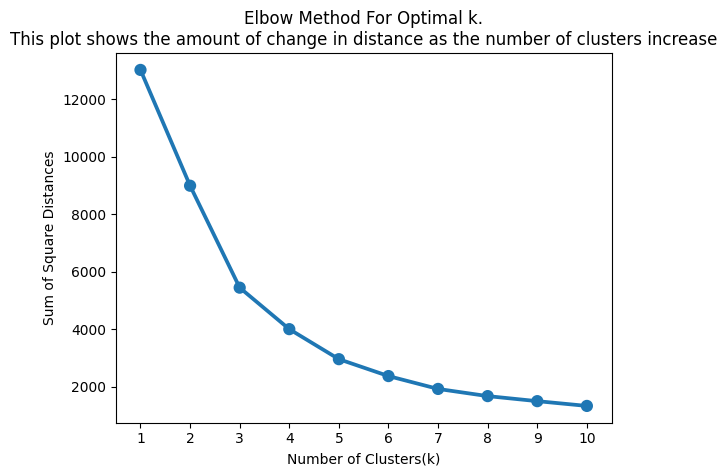

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pointplot(x = list(inertia.keys()), y = list(inertia.values()))
plt.title('Elbow Method For Optimal k.\n' + 'This plot shows the amount of change in distance as the number of clusters increase')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')

 Here we can see that the optimal number of clusters equals to 5.

#### Applying Silhouette Score

In [31]:
from sklearn.metrics import silhouette_score
scores= []
for no_clusters in range(3,15):
    clusters = KMeans(n_clusters=no_clusters, n_init=10, random_state=1)
    preds = clusters.fit_predict(x_scaled)
    centers = clusters.cluster_centers_
    
    score = silhouette_score(x_scaled, preds)
    scores.append(score)
    print(f'For n_clusters = {no_clusters}, silhouette score = {score}')

For n_clusters = 3, silhouette score = 0.6020969630438252
For n_clusters = 4, silhouette score = 0.6010450944920473
For n_clusters = 5, silhouette score = 0.6164673103034002
For n_clusters = 6, silhouette score = 0.5903127619124553
For n_clusters = 7, silhouette score = 0.5295234065721339
For n_clusters = 8, silhouette score = 0.5221902884378339
For n_clusters = 9, silhouette score = 0.4829978347516078
For n_clusters = 10, silhouette score = 0.4302476827292436
For n_clusters = 11, silhouette score = 0.43160257887955067
For n_clusters = 12, silhouette score = 0.43325427384683873
For n_clusters = 13, silhouette score = 0.4168601485578788
For n_clusters = 14, silhouette score = 0.4360824169525093


Text(0, 0.5, 'Silhouette Score')

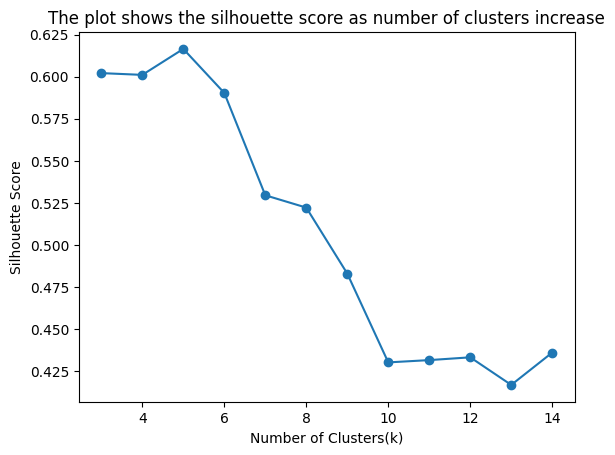

In [32]:
plt.plot(range(3,15), scores, marker='o')
plt.title('The plot shows the silhouette score as number of clusters increase')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette Score')

we can see from the above plot that the highest score exist at clusters equal to 5

#### Verifying KMeans Clustering

In [33]:
kmeans = KMeans(n_clusters=5, n_init=10)
preds = kmeans.fit_predict(x_scaled)
RFM_data['NO_clusters'] = kmeans.labels_ +1
RFM_data

,CustomerID,Recency,Frequency,Monetary,NO_clusters
0,12346.0,325,1,77183.60,5
1,12347.0,2,182,4310.00,1
2,12348.0,75,31,1797.24,1
3,12349.0,18,73,1757.55,1
4,12350.0,310,17,334.40,2
...,...,...,...,...,...
4333,18280.0,277,10,180.60,2
4334,18281.0,180,7,80.82,2
4335,18282.0,7,12,178.05,1
4336,18283.0,3,721,2045.53,5


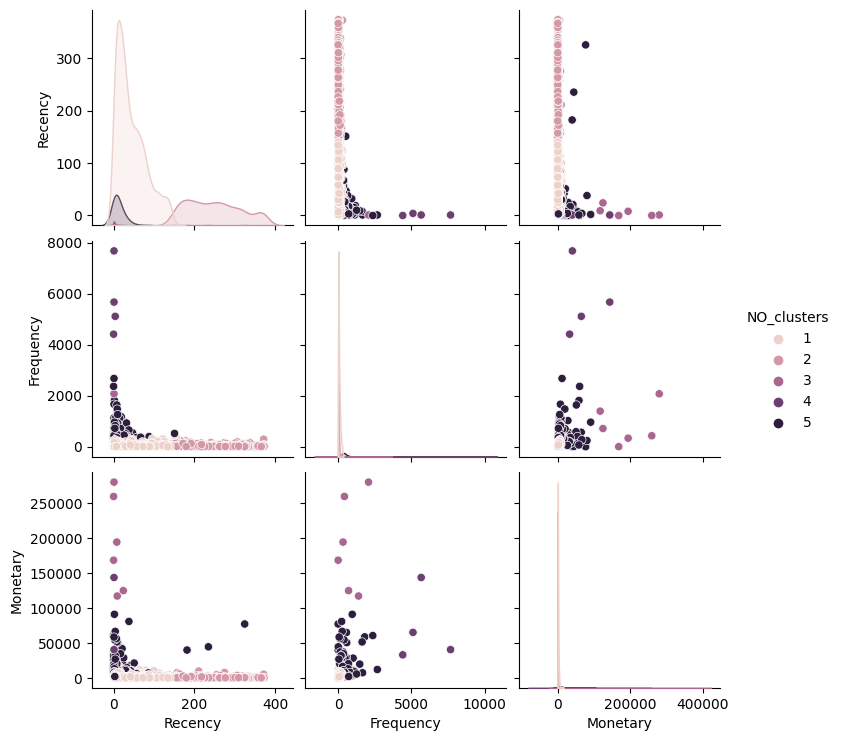

In [34]:
data = RFM_data.drop('CustomerID', axis=1)
sns.pairplot(data, hue='NO_clusters')

In [35]:
data.columns

Index(['Recency', 'Frequency', 'Monetary', 'NO_clusters'], dtype='object')

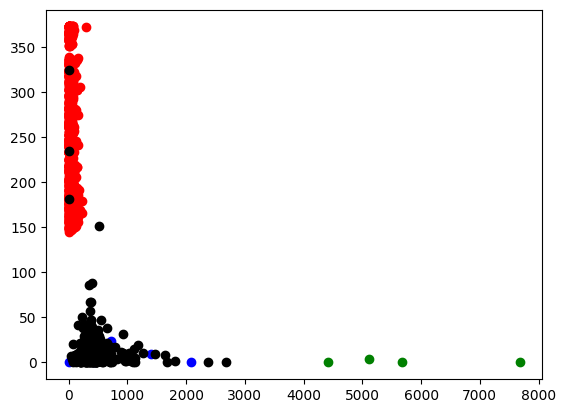

In [41]:
plt.scatter(data.iloc[preds==1,1],data.iloc[preds==1,0], color='red')
plt.scatter(data.iloc[preds==2,1],data.iloc[preds==2,0], color='blue')
plt.scatter(data.iloc[preds==3,1],data.iloc[preds==3,0], color='green')
plt.scatter(data.iloc[preds==4,1],data.iloc[preds==4,0], color='black')
plt.scatter(data.iloc[preds==5,1],data.iloc[preds==5,0], color='cyan')


In [37]:
summary = RFM_data.groupby(['NO_clusters']).agg({'Recency':['max', 'min', 'mean'], 'Frequency':['max', 'min', 'mean'], 'Monetary':['max', 'min', 'mean']})
summary

Recency                  Frequency                      Monetary  \
                max  min        mean       max   min         mean        max   
NO_clusters                                                                    
1               156    0   43.885582       342     1    72.061177   16209.50   
2               373  145  248.985782       297     1    27.405687    9864.26   
3                24    0    7.000000      2076     3   825.833333  280206.02   
4                 4    0    1.500000      7676  4412  5717.250000  143711.17   
5               325    0   15.726908      2677     1   474.064257   91062.38   

                                       
                   min           mean  
NO_clusters                            
1                 6.20    1328.738576  
2                 3.75     488.761897  
3            117210.08  190808.536667  
4             33053.19   70612.247500  
5              1071.73   11751.644297